All the speech signals were sampled at 22050 Hz. For each utterance, a spectral envelope, a logarithmic fundamental frequency (log F0), and aperiodicities (APs) were extracted every 5 ms using the WORLD analyzer . 36 mel-cepstral coefficients (MCCs) were then extracted from each spectral envelope. The F0 contours were converted using the logarithm Gaussian normalized transformation described in . The aperiodicities were used directly without modification

In [ ]:
!pip install pyworld

     |████████████████████████████████| 225kB 5.4MB/s 
  Created wheel for pyworld: filename=pyworld-0.2.12-cp37-cp37m-linux_x86_64.whl size=610816 sha256=3fe874f16eb6823c0db2bdc14977b116d3dde97306afe54a1be6cb5f0bdeb7bd
  Stored in directory: /root/.cache/pip/wheels/d0/e4/1c/a508000462b83164d5eba9a4b46f39b4b1645ac952bbe71551
Successfully built pyworld


As an acoustic feature vector, we use mel-cepstral coefficients computed from a spectral envelope obtained using WORLD . After training G, we can convert the acoustic feature sequence x of an input utterance with 

yˆ = G(x, c),

A naıve way of obtaining a time-domain signal is simply to use ˆy to reconstruct a signal with a vocoder. Instead of directly using ˆy, we can also use the reconstructed feature sequence

 yˆ′ = G(x, c′),

to obtain a time-domain signal if the attribute c′ of the input speech is known. By using ˆy and ˆy′, we can obtain a sequence of spectral gain functions. Once we obtain the spectral gain functions, we can reconstruct a time-domain signal by multiplying the spectral envelope of input speech by the spectral gain function frame-by-frame and resynthesizing the signal using a vocoder.

goal is to get n x 1 x 36 X 512

https://www.youtube.com/watch?v=4_SH2nfbQZ8 

really detailed video understanding for mfcc and y we use it 

In [ ]:
import librosa
import pyworld
import numpy as np
from IPython.display import Audio

def load_wav(wav_file, sr=22050):
  wav, _ = librosa.load(wav_file, sr=sr, mono=True)
  if len(wav)>=56338:
    return wav[:56338] ,True  # we will cut it so that we get 512 X 36 features when we get mcc as 201  X 36 we gwt when we cut it to 1 sec = 22050 samples
  else:
    return wav , False

In [ ]:
wav,_ =load_wav("/content/drive/MyDrive/vcc2018_training/VCC2SF1/10009.wav",22050)
wav = wav.astype(np.float64) #load wav file 
wav=wav[:56338]
fs=22050 # sampling rate
f0, timeaxis = pyworld.harvest(wav, fs, frame_period = 5.0)#, f0_floor = 71.0, f0_ceil = 800.0) ,Estimated F0 contour.
# # print(max(f0))
# f0=np.ma.log(f0)
# # print(f0.max())
spectrogram = pyworld.cheaptrick(wav, f0, timeaxis, fs)#,fft_size=1022)
aperiodicity= pyworld.d4c(wav, f0, timeaxis, fs)#,fft_size=1022)

coded_sp = pyworld.code_spectral_envelope(spectrogram,22050,36) # mel cepstral coefficient 36 MCC 
Audio(wav,rate=22050)

In [ ]:
coded_sp.shape

(512, 36)

In [ ]:
fftlen = pyworld.get_cheaptrick_fft_size(fs)
# f0=np.ma.exp(f0)
decoded_sp = pyworld.decode_spectral_envelope(coded_sp, fs,fftlen)
wav = pyworld.synthesize(f0, decoded_sp,aperiodicity, fs, frame_period=5)
# Librosa could not save wav if not doing so
wav = wav.astype(np.float32)


In [ ]:
Audio(wav,rate=22050)

In [ ]:
print(f"wave shape :{wav.shape[0]} \nfundamental frequency :{f0.shape[0]} \ntimeaxis shape :{timeaxis.shape[0]}\nspectogram shape :{spectrogram.shape}\naperiodicity is :{aperiodicity.shape}")

wave shape :56448 
fundamental frequency :512 
timeaxis shape :512
spectogram shape :(512, 513)
aperiodicity is :(512, 513)


#Analyze acoustic features based on WORLD

#analyze F0, spectral envelope, aperiodicity

 #       Paramters
        ---------
 #       x : array, shape (`T`)
 #           monoral speech signal in time domain

#      Returns
        ---------
#       f0 : array, shape (`T`,)
#           F0 sequence
#       spc : array, shape (`T`, `fftl / 2 + 1`)
#           Spectral envelope sequence
#       ap: array, shape (`T`, `fftl / 2 + 1`)
#           aperiodicity sequence




        

fundamental frequency is independent from complexcity of the shape 

its the inverse of distance between repeating waveform 

For each utterance, a spectral envelope, a logarithmic fundamental frequency (log F0), and aperiodicities (APs) were extracted every 5 ms using the WORLD analyzer

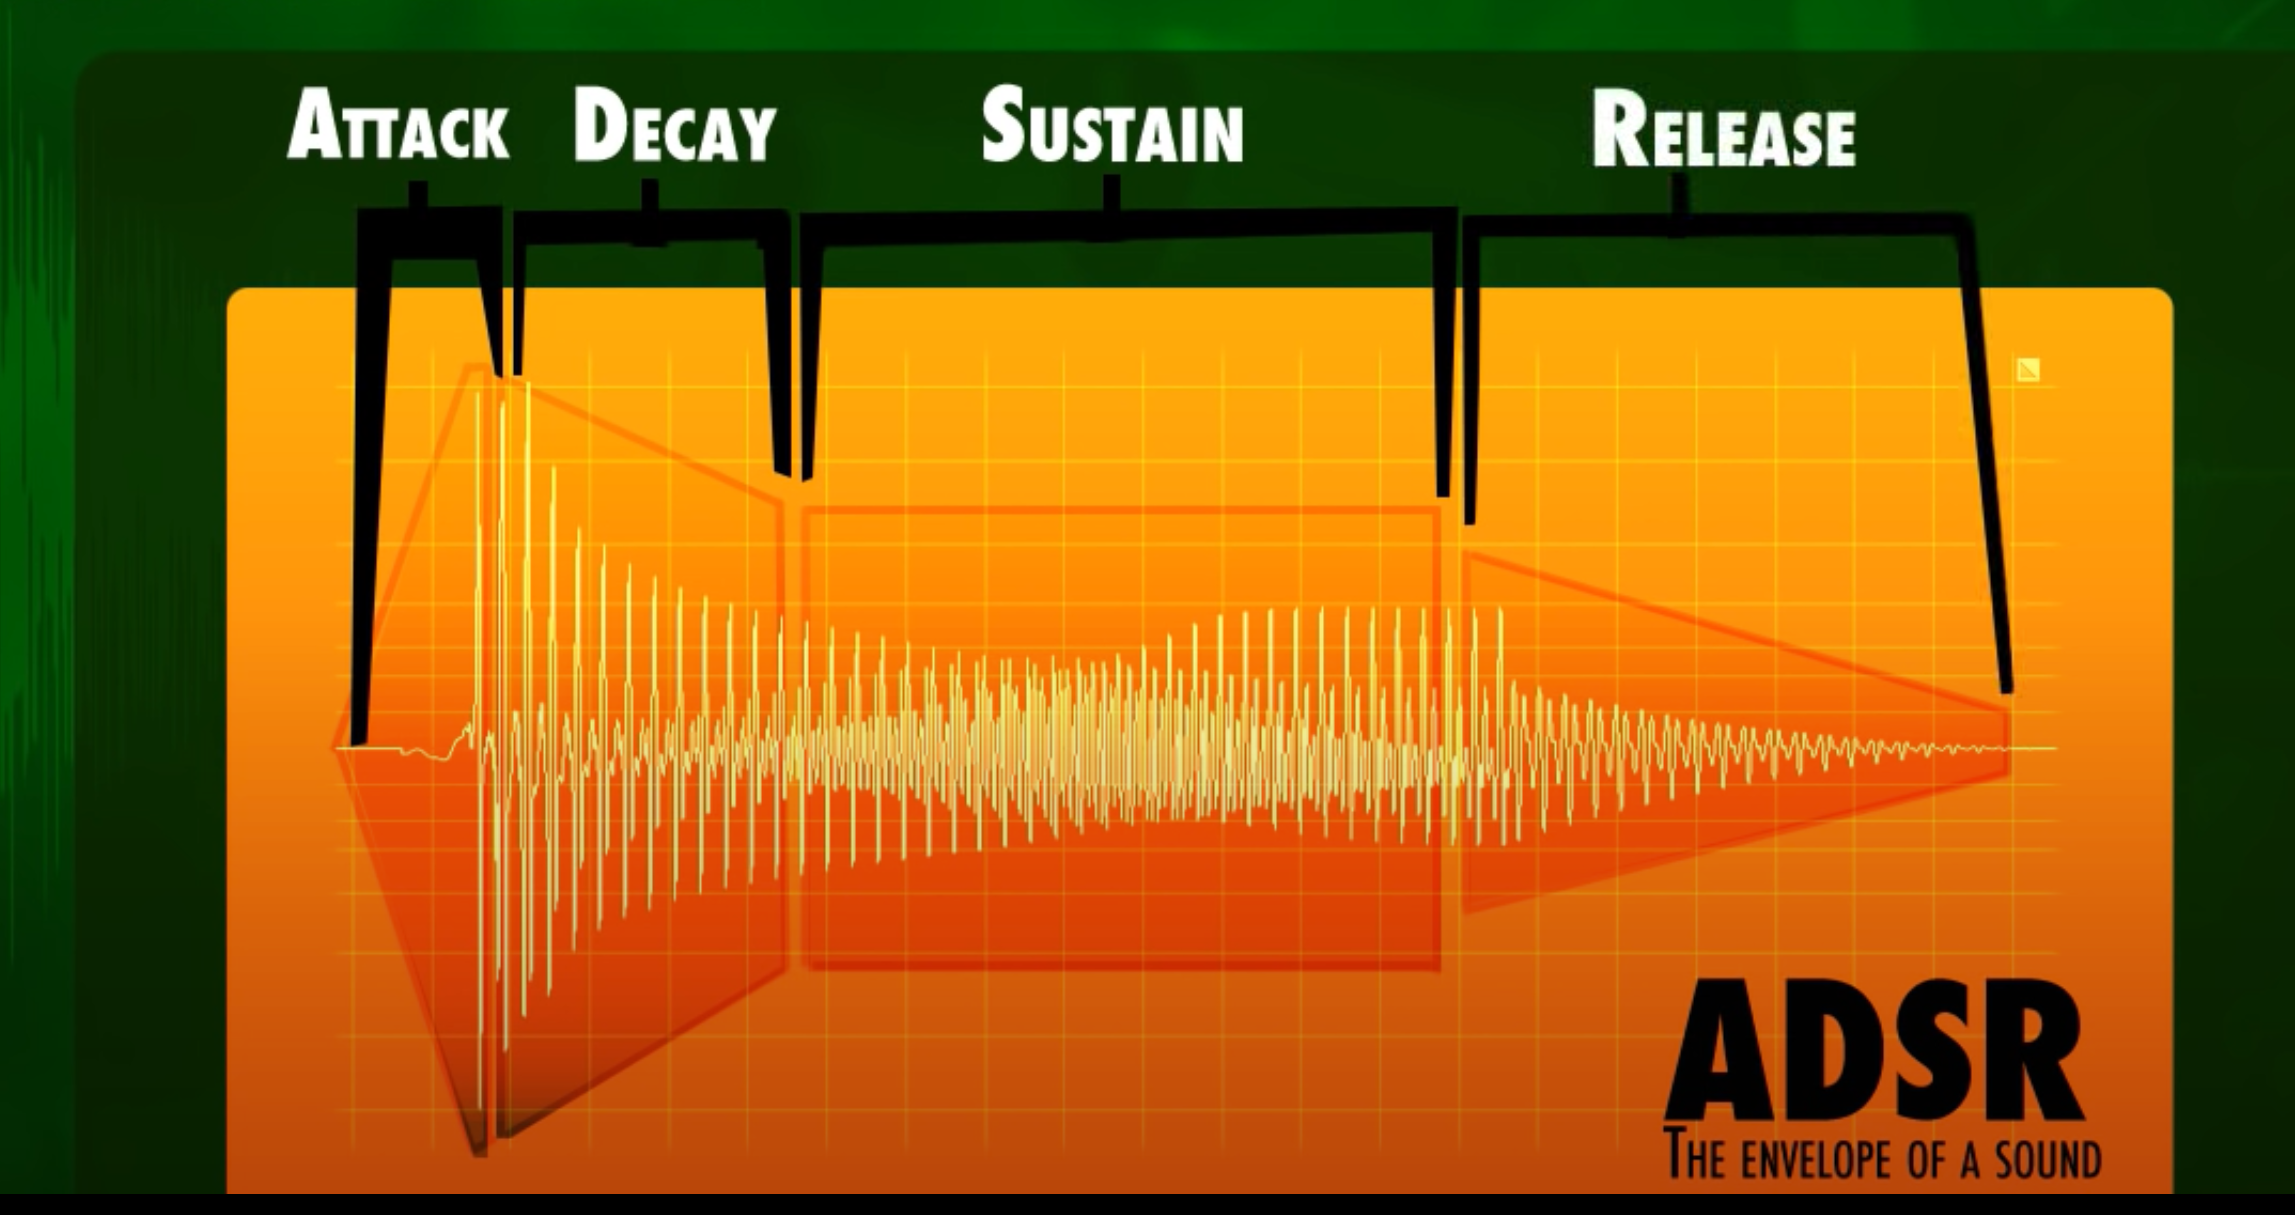

In [ ]:
def one_hot(source=1,to=1,number_of_speaker=4):
  import numpy as np 
  c=np.zeros([number_of_speaker,number_of_speaker])
  c[source-1,to-1]=1
  return c

In [ ]:
one_hot(2,4,4)

array([[0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [ ]:
from itertools import permutations 
perm = permutations(["VCC2SF1","VCC2SF2","VCC2SM1","VCC2SM2"], 2)

for i in perm:
  print(i) 

In [ ]:
main_path="/content/drive/MyDrive/vcc2018_training/"

In [ ]:
subpath=main_path+"VCC2SF1"+"/*.wav"

In [ ]:
from glob import glob

paths=glob(subpath)
len(paths)

81

In [ ]:
!pip install pyworld

In [ ]:
import librosa
import pyworld
import numpy as np

def load_wav(wav_file, sr=22050):
  wav, _ = librosa.load(wav_file, sr=sr, mono=True)
  if len(wav)>=56338:
    return wav[:56338] ,True  # we will cut it so that we get 512 X 36 features when we get mcc as 201  X 36 we gwt when we cut it to 1 sec = 22050 samples
  else:
    return wav , False

def world_features (wav, fs=22050, frame_period = 5.0):  #fs is sampling rate 
    # Decompose speech signal into f0, spectral envelope and aperiodicity using WORLD
  wav = wav.astype(np.float64)   # 64-bit float type
  f0, timeaxis = pyworld.harvest(wav, fs, frame_period = frame_period, f0_floor = 71.0, f0_ceil = 800.0) # get fundamental frequency and time axis, Estimated F0 contour.
  spectrogram = pyworld.cheaptrick(wav, f0, timeaxis, fs)
  aperiodicity= pyworld.d4c(wav, f0, timeaxis, fs)

  return f0, timeaxis, spectrogram, aperiodicity

# 36 mel-cepstral coefficients (MCCs) were then extracted from each spectral envelope
def MCCs(spectrogram,sr=22050,dim=36):
  mcc_features = pyworld.code_spectral_envelope(spectrogram,22050,36)
  return mcc_features

def inver_MCCs(mcc_features,sr=22050,dim=36):
  fftlen = pyworld.get_cheaptrick_fft_size(sr)
  decoded_sp=pyworld.decode_spectral_envelope(mcc_features, sr,fftlen) # gives a spectogram
  return decoded_sp

def get_wav(f0, mcc_features,aperiodicity, sr=22050, frame_period=5):
  #get wav file 
  decoded_sp=inver_MCCs(mcc_features)
  wav = pyworld.synthesize(f0, decoded_sp,aperiodicity, sr, frame_period)
  # Librosa could not save wav if not doing so
  wav = wav.astype(np.float32)
  return wav


In [ ]:
# np.savez("/content/drive/MyDrive/try",f0=f0, mcc_features=mcc_features, aperiodicity=aperiodicity)
# data=np.load("/content/drive/MyDrive/try.npz")
# f0, mcc_features, aperiodicity=data["f0"],data["mcc_features"],data["aperiodicity"]
# wav=get_wav(f0, mcc_features, aperiodicity)
# Audio(wav,rate=22050)

In [ ]:

os.mkdir("/content/drive/MyDrive/PREPROCESS_DATA")

for i in folder_name:
  subpath=main_path+i+"/*.wav"
  os.mkdir("/content/drive/MyDrive/PREPROCESS_DATA/"+i)

In [ ]:
import tqdm
from glob import glob
import os 

folder_name=["VCC2SF1","VCC2SF2","VCC2SM1","VCC2SM2"]
main_path="/content/drive/MyDrive/vcc2018_training/"

for i in folder_name:
  subpath=main_path+i+"/*.wav"
  paths=glob(subpath)
  # print("starting pre procesing of "+i)
  for j in tqdm.tqdm(paths,dynamic_ncols=True):
    wav,condition=load_wav(j)
    if condition:
      f0, timeaxis, spectrogram, aperiodicity=world_features(wav)
      mcc_features=MCCs(spectrogram)
      file_name=os.path.basename(j).replace(".wav", "")
      save_path="/content/drive/MyDrive/PREPROCESS_DATA/"+i+"/"+ file_name
      np.savez(save_path,f0=f0, mcc_features=mcc_features, aperiodicity=aperiodicity)



In [ ]:
from IPython.display import Audio
data=np.load("/content/drive/MyDrive/PREPROCESS_DATA/VCC2SF1/10006.npz")
f0, mcc_features, aperiodicity=data["f0"],data["mcc_features"],data["aperiodicity"]

wav=get_wav(f0, mcc_features, aperiodicity)
Audio(wav,rate=22050)

In [ ]:
def one_hot(source,to,speaker_list=["VCC2SF1","VCC2SF2","VCC2SM1","VCC2SM2"]):
  import numpy as np 
  len_=len(speaker_list)
  source=speaker_list.index(source)
  to=speaker_list.index(to)
  c=np.zeros([len_,len_])
  c[source,to]=1
  return c

In [ ]:
from glob import glob
from os import path
from itertools import permutations 
from tqdm import tqdm
perm = permutations(["VCC2SF1","VCC2SF2","VCC2SM1","VCC2SM2"], 2)

os.mkdir("/content/drive/MyDrive/PREPROCESS_DATA/final_data/")

save_path="/content/drive/MyDrive/PREPROCESS_DATA/final_data/"
load_data_path="/content/drive/MyDrive/PREPROCESS_DATA/"
for i in tqdm(perm):
  source=load_data_path+i[0]+"/*.npz"
  target=load_data_path+i[1]+"/" #*.npz"
  source=glob(source)
  # target=glob(target)
  for j in tqdm(source):
    file_name=os.path.basename(j)
    if path.exists(target+file_name):
      data=np.load(j)
      f0_s, mcc_features_s, aperiodicity_s=data["f0"],data["mcc_features"],data["aperiodicity"]
      data=np.load(target+file_name)
      f0_t, mcc_features_t, aperiodicity_t=data["f0"],data["mcc_features"],data["aperiodicity"]
      c=one_hot(i[0],i[1])
      save_path_final=save_path+i[0]+"_"+i[1]+"_"+file_name
      np.savez(save_path_final,f0_s=f0_s, mcc_features_s=mcc_features_s, aperiodicity_s=aperiodicity_s,f0_t=f0_t, mcc_features_t= mcc_features_t, aperiodicity_t=aperiodicity_t,c=c)


In [ ]:
from torch.utils.data import Dataset,DataLoader
from glob import glob
import numpy as np
import torch


class audio_data(Dataset):
  def __init__(self,path="/content/drive/MyDrive/PREPROCESS_DATA/final_data/"):
    self.paths=glob(path+"*")
    self.total_length=len(paths)

  def __len__(self):
    return self.total_length

  def __getitem__(self,idx):
    data=np.load(self.paths[idx])
    mcc_features_s,mcc_features_t,c=data["mcc_features_s"],data["mcc_features_t"],data["c"]
    
    return torch.Tensor(mcc_features_s),torch.Tensor(mcc_features_t),torch.Tensor(c)


In [ ]:
dataset=audio_data()

In [ ]:
mcc_features_s,mcc_features_t,c=dataset[583]
print(mcc_features_s.shape,mcc_features_t.shape,c.shape)

torch.Size([512, 36]) torch.Size([512, 36]) torch.Size([4, 4])


In [ ]:
path="/content/drive/MyDrive/PREPROCESS_DATA/final_data/"
paths=glob(path+"*")
len(paths)

586

In [ ]:
import multiprocessing
pool = multiprocessing.Pool()

dataloader=DataLoader(dataset, batch_size=64, shuffle=True, sampler=None,
           batch_sampler=None, num_workers=pool._processes, collate_fn=None,
           pin_memory=False, drop_last=False, timeout=0,
           worker_init_fn=None, prefetch_factor=2,
           persistent_workers=False)